# Python_DeepLearning_Pytorch - part3
#### 딥러닝과 파이토치와 관련된 기본적인 내용을 정리하였습니다. 파이썬 딥러닝 파이토치(이경택, 방성수, 안상주 지음)을 참고하였습니다. 
#### GPU 사용을 위해서 google colab을 활용하여 작성하였습니다.

## 3. Deep Learning
#### - 딥러닝의 기본이 되는 신경망 모델이 암흑기를 거쳐 딥러닝으로 부흥하게 된 계기와 딥러닝의 중요한 특징을 설명

In [ ]:
#### 6. MLP 모델 설계 시 Drop out 적용(part2의 예시 코드 일부분을 수정 - 돌아가지 않음)
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28 * 28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)
    self.dropout_prob = 0.5    #### dropout 가중치 = 0.5

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    x = F.sigmoid(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob)    #### dropout 적용 / 학습 과정 시에만 dropout이 이루어짐 / model.train() -> self.training = True
    x = self.fc2(x)
    x = F.sigmoid(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob)
    x = self.fc3(x)
    x = F.log_softmax(x, dim = 1)
  
  return x

In [ ]:
#### 6. MLP 모델 설계 시 relu 적용(part2의 예시 코드 일부분을 수정 - 돌아가지 않음)
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28 * 28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)
    self.dropout_prob = 0.5    #### dropout 가중치 = 0.5

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    x = F.relu(x)    #### activation function을 relu로 변경
    x = F.dropout(x, training = self.training, p = self.dropout_prob)    #### dropout 적용 / 학습 과정 시에만 dropout이 이루어짐 / model.train() -> self.training = True
    x = self.fc2(x)
    x = F.relu(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob)
    x = self.fc3(x)
    x = F.log_softmax(x, dim = 1)
  
  return x

In [ ]:
#### 6. MLP 모델 설계 시 batch normalization 적용(part2의 예시 코드 일부분을 수정 - 돌아가지 않음)
#### batch normalization은 1d, 2d, 3d 등 다양한 차원에 따라 적용되는 함수명이 다름 
#### batch normalization을 activation function 이전, 이후 적용 여부는 연구자들의 선호도에 따라 다름
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28 * 28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)
    self.dropout_prob = 0.5    #### dropout 가중치 = 0.5
    self.batch_norm1 = nn.BatchNorm1d(512)    #### batch normalization 설정
    self.batch_norm2 = nn.BatchNorm1d(256)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    x = self.batch_norm1(x)    #### batch normalization 적용 - activation function  이전에 적용
    x = F.relu(x)    #### activation function을 relu로 변경
    x = F.dropout(x, training = self.training, p = self.dropout_prob)    #### dropout 적용 / 학습 과정 시에만 dropout이 이루어짐 / model.train() -> self.training = True
    x = self.fc2(x)
    x = self.batch_norm2(x)
    x = F.relu(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob)
    x = self.fc3(x)
    x = F.log_softmax(x, dim = 1)
  
  return x

#### - 일반적인 딥러닝 모델은 다음 순서대로 설계해 학습하고 성능을 평가 
#### 1. 모델 구조를 설계하고 설계된 모델 구조의 파라미터 값을 랜덤으로 샘플링
#### 2. Feature 값으로 이용되는 데이터를 설계한 모델의 Input으로 사용해 Output 계산
#### 3. 계산된 Output을 Input으로 이용한 Feature 값과 매칭되는 레이블 값을 기존에 정의한 objective function을 통해 loss 값으로 계산
#### 4. 계산된 loss 값을 통해 gradient를 계산해 모델 내 파라미터 값을 back propagation에 의해 업데이트 
#### 5. 반복하여 학습을 진행하여 완성된 모델의 성능을 평가
#### torch 내의 nn.linear는 output으로 계산되는 벡터의 차원 수으 ㅣ역수 값에 대한 + / - 범위 내 균등분포를 설정해 파라미터 값을 초기 샘플링

In [ ]:
#### 7. optimizer, objective functio 설정하기(part2의 예시 코드 일부를 수정 - 돌아가지 않음)
import torch.nn.init as init    #### 딥러닝 모델에서 초기값으로 설정되는 요소들의 모듈
def weight_init(m):
  if isintance(m, nn.Linear):
    init.kaiming_uniform_(m.weight.data)    ####  kaiming_uniform_ = He Initialization 

model = Net().to(DEVICE)
model.apply(weight_init)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

#### 예제 3.6 옷 종류 데이터 FashionMNIST를 활용해 AE 설계하기
#### AE 모델을 설계하는 순서는 다음과 같다. 
#### 1. 모듈 임포트 
#### 2. 딥러닝 모델을 설계할 때 활용하는 장비 확인
#### 3. 데이터 다운로드(train, test 분리)
#### 4. 데이터 확인 (1)
#### 5. 데이터 확인 (2)
#### 6. AE 모델 설계
#### 7. optimizer, objective function 설정
#### 8. AE 모델 학습을 진행하며 학습 데이터에 대한 모델 성능 확인하는 함수 정의 
#### 9. 검증 데이터에 대한 모델 서능 확인하는 함수 정의 
#### 10. AE 학습을 실행하며 test set의 reconstruction error 확인

In [2]:
#### 1. 모듈 임포트
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn 
import torch.nn.functional as F 
from torchvision import transforms, datasets

In [6]:
#### 2. 딥러닝 모델을 설계할 때 활용하는 장비 확인
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')

print('Using Pytorch version: ', torch.__version__, 'Device : ', DEVICE)

BATCH_SIZE = 32
EPOCHS = 10

Using Pytorch version:  1.8.1+cu101 Device :  cuda


In [7]:
#### 3. FashionMNIST 데이터 다운(train, test 분리)
train_dataset = datasets.FashionMNIST(root = "../data/FashoinMNIST", 
                                      train = True, 
                                      download = True, 
                                      transform = transforms.ToTensor())
test_dataset = datasets.FashionMNIST(root = "../data/FashoinMNIST", 
                                      train = False, 
                                      transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                           batch_size = BATCH_SIZE, 
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset= test_dataset, 
                                          batch_size = BATCH_SIZE, 
                                          shuffle = False)


Extracting ../data/FashoinMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashoinMNIST/FashionMNIST/raw




Extracting ../data/FashoinMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashoinMNIST/FashionMNIST/raw




Extracting ../data/FashoinMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashoinMNIST/FashionMNIST/raw




Extracting ../data/FashoinMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashoinMNIST/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
#### 4. 데이터 확인 (1)
for (X_train, y_train) in train_loader:
  print('X_train:', X_train.size(), 'type:', X_train.type())
  print('y_train:', y_train.size(), 'type:', y_train.type())
  break


X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


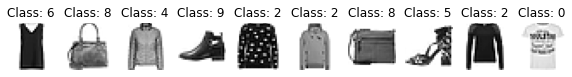

In [10]:
#### 5. 데이터 확인 (2)
pltsize = 1
plt.figure(figsize = (10 * pltsize, pltsize))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.axis('off')
  plt.imshow(X_train[i, :, :, :].numpy().reshape(28,28), cmap = 'gray_r')
  plt.title('Class: ' + str(y_train[i].item()))

In [13]:
#### 6. AE 모델 설계
class AE(nn.Module):
  def __init__(self):
    super(AE, self).__init__()    #### nn.Module 내에 있는 메서드를 상속받아 사용

    self.encoder = nn.Sequential(    #### encoder를 한 번에 정의
        nn.Linear(28 * 28, 512), 
        nn.ReLU(), 
        nn.Linear(512, 256), 
        nn.ReLU(),
        nn.Linear(256, 32),)    #### encoder를 통해서 만든 latent vector의 size = 32
    
    self.decoder = nn.Sequential(
        nn.Linear(32, 256), 
        nn.ReLU(), 
        nn.Linear(256, 512),
        nn.ReLU(), 
        nn.Linear(512, 28*28),)
    
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [14]:
#### Optimizer, Objective Function 설정
model = AE().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.MSELoss()    #### AE 모델의 Output값과 계산될 Label 값은 이미지 데이터 그 자체이므로 이미지 데이터 값 간의 MSE를 LOSS로 생각
print(model)

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
  )
)


In [15]:
#### 8. AE 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의 
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx, (image, _) in enumerate(train_loader):
    image = image.view(-1, 28*28).to(DEVICE)
    target = image.view(-1, 28*28).to(DEVICE)
    optimizer.zero_grad()    #### optimizer의 gradient를 초기화
    encoded, decoded = model(image)
    loss = criterion(decoded, target)
    loss.backward()    #### back propagation을 통해 계산된 gradient 값을 파라미터에 할당
    optimizer.step()   #### 파라미터 업데이트

    if batch_idx % log_interval == 0:
      print("Train Epoch: {} [{} / {}({:.0f}%)]\tTrain Loss: {:.6f}". format(Epoch, batch_idx * len(image), 
                                                                             len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))

In [16]:
#### 9. 검증 데이터에 대한 모델 성능을 확인하는 함수 정의
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  real_image = []
  gen_image = []
  with torch.no_grad():
    for image, _ in test_loader:
      image = image.view(-1, 28 * 28).to(DEVICE)
      target = image.view(-1, 28 * 28).to(DEVICE)
      encoded, decoded = model(image)

      test_loss += criterion(decoded, image).item()
      real_image.append(image.to('cpu'))
      gen_image.append(image.to('cpu'))

  test_loss /= len(test_loader.dataset)
  return test_loss, real_image, gen_image

Train Epoch: 1 [0 / 60000(0%)]	Train Loss: 0.018509
Train Epoch: 1 [6400 / 60000(11%)]	Train Loss: 0.014355
Train Epoch: 1 [12800 / 60000(21%)]	Train Loss: 0.014760
Train Epoch: 1 [19200 / 60000(32%)]	Train Loss: 0.013022
Train Epoch: 1 [25600 / 60000(43%)]	Train Loss: 0.011834
Train Epoch: 1 [32000 / 60000(53%)]	Train Loss: 0.013677
Train Epoch: 1 [38400 / 60000(64%)]	Train Loss: 0.011870
Train Epoch: 1 [44800 / 60000(75%)]	Train Loss: 0.011592
Train Epoch: 1 [51200 / 60000(85%)]	Train Loss: 0.012171
Train Epoch: 1 [57600 / 60000(96%)]	Train Loss: 0.013000

[EPOCH: 1], 	Test LOSS: 0.0004


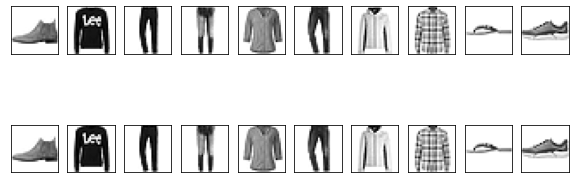

Train Epoch: 2 [0 / 60000(0%)]	Train Loss: 0.013815
Train Epoch: 2 [6400 / 60000(11%)]	Train Loss: 0.010168
Train Epoch: 2 [12800 / 60000(21%)]	Train Loss: 0.011863
Train Epoch: 2 [19200 / 60000(32%)]	Train Loss: 0.012315
Train Epoch: 2 [25600 / 60000(43%)]	Train Loss: 0.011185
Train Epoch: 2 [32000 / 60000(53%)]	Train Loss: 0.011021
Train Epoch: 2 [38400 / 60000(64%)]	Train Loss: 0.010772
Train Epoch: 2 [44800 / 60000(75%)]	Train Loss: 0.013326
Train Epoch: 2 [51200 / 60000(85%)]	Train Loss: 0.013609
Train Epoch: 2 [57600 / 60000(96%)]	Train Loss: 0.011464

[EPOCH: 2], 	Test LOSS: 0.0004


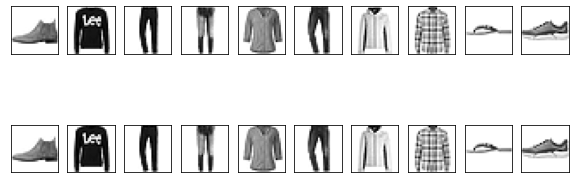

Train Epoch: 3 [0 / 60000(0%)]	Train Loss: 0.011136
Train Epoch: 3 [6400 / 60000(11%)]	Train Loss: 0.012536
Train Epoch: 3 [12800 / 60000(21%)]	Train Loss: 0.013154
Train Epoch: 3 [19200 / 60000(32%)]	Train Loss: 0.011697
Train Epoch: 3 [25600 / 60000(43%)]	Train Loss: 0.012086
Train Epoch: 3 [32000 / 60000(53%)]	Train Loss: 0.010244
Train Epoch: 3 [38400 / 60000(64%)]	Train Loss: 0.013662
Train Epoch: 3 [44800 / 60000(75%)]	Train Loss: 0.009955
Train Epoch: 3 [51200 / 60000(85%)]	Train Loss: 0.013800
Train Epoch: 3 [57600 / 60000(96%)]	Train Loss: 0.011074

[EPOCH: 3], 	Test LOSS: 0.0004


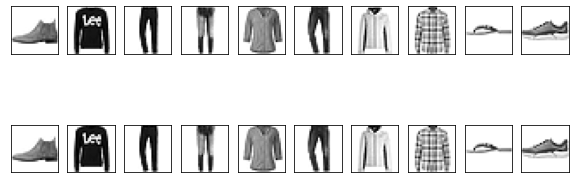

Train Epoch: 4 [0 / 60000(0%)]	Train Loss: 0.011657
Train Epoch: 4 [6400 / 60000(11%)]	Train Loss: 0.012615
Train Epoch: 4 [12800 / 60000(21%)]	Train Loss: 0.012060
Train Epoch: 4 [19200 / 60000(32%)]	Train Loss: 0.009819
Train Epoch: 4 [25600 / 60000(43%)]	Train Loss: 0.012293
Train Epoch: 4 [32000 / 60000(53%)]	Train Loss: 0.011234
Train Epoch: 4 [38400 / 60000(64%)]	Train Loss: 0.010286
Train Epoch: 4 [44800 / 60000(75%)]	Train Loss: 0.010763
Train Epoch: 4 [51200 / 60000(85%)]	Train Loss: 0.012259
Train Epoch: 4 [57600 / 60000(96%)]	Train Loss: 0.009865

[EPOCH: 4], 	Test LOSS: 0.0003


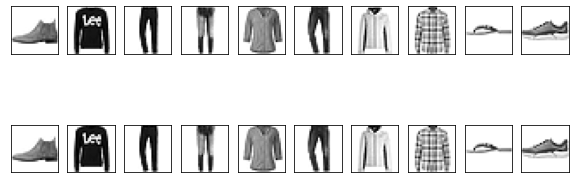

Train Epoch: 5 [0 / 60000(0%)]	Train Loss: 0.012852
Train Epoch: 5 [6400 / 60000(11%)]	Train Loss: 0.009547
Train Epoch: 5 [12800 / 60000(21%)]	Train Loss: 0.009122
Train Epoch: 5 [19200 / 60000(32%)]	Train Loss: 0.009177
Train Epoch: 5 [25600 / 60000(43%)]	Train Loss: 0.014512
Train Epoch: 5 [32000 / 60000(53%)]	Train Loss: 0.009572
Train Epoch: 5 [38400 / 60000(64%)]	Train Loss: 0.012834
Train Epoch: 5 [44800 / 60000(75%)]	Train Loss: 0.010193
Train Epoch: 5 [51200 / 60000(85%)]	Train Loss: 0.008821
Train Epoch: 5 [57600 / 60000(96%)]	Train Loss: 0.010870

[EPOCH: 5], 	Test LOSS: 0.0003


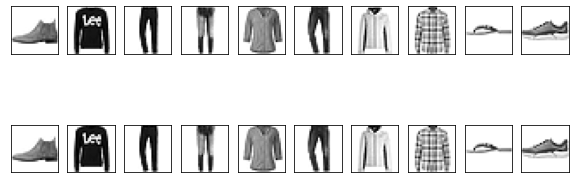

Train Epoch: 6 [0 / 60000(0%)]	Train Loss: 0.011582
Train Epoch: 6 [6400 / 60000(11%)]	Train Loss: 0.013813
Train Epoch: 6 [12800 / 60000(21%)]	Train Loss: 0.008668
Train Epoch: 6 [19200 / 60000(32%)]	Train Loss: 0.012166
Train Epoch: 6 [25600 / 60000(43%)]	Train Loss: 0.011919
Train Epoch: 6 [32000 / 60000(53%)]	Train Loss: 0.008960
Train Epoch: 6 [38400 / 60000(64%)]	Train Loss: 0.008403
Train Epoch: 6 [44800 / 60000(75%)]	Train Loss: 0.009567
Train Epoch: 6 [51200 / 60000(85%)]	Train Loss: 0.010011
Train Epoch: 6 [57600 / 60000(96%)]	Train Loss: 0.009831

[EPOCH: 6], 	Test LOSS: 0.0003


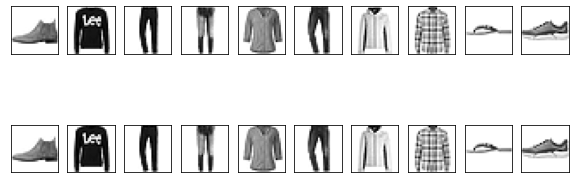

Train Epoch: 7 [0 / 60000(0%)]	Train Loss: 0.011463
Train Epoch: 7 [6400 / 60000(11%)]	Train Loss: 0.008500
Train Epoch: 7 [12800 / 60000(21%)]	Train Loss: 0.009258
Train Epoch: 7 [19200 / 60000(32%)]	Train Loss: 0.010675
Train Epoch: 7 [25600 / 60000(43%)]	Train Loss: 0.010316
Train Epoch: 7 [32000 / 60000(53%)]	Train Loss: 0.009990
Train Epoch: 7 [38400 / 60000(64%)]	Train Loss: 0.009606
Train Epoch: 7 [44800 / 60000(75%)]	Train Loss: 0.008245
Train Epoch: 7 [51200 / 60000(85%)]	Train Loss: 0.012066
Train Epoch: 7 [57600 / 60000(96%)]	Train Loss: 0.007976

[EPOCH: 7], 	Test LOSS: 0.0003


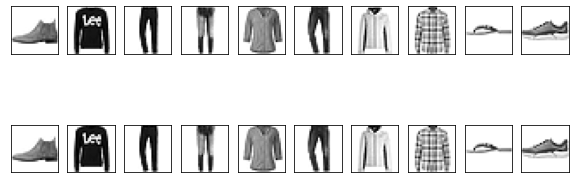

Train Epoch: 8 [0 / 60000(0%)]	Train Loss: 0.009085
Train Epoch: 8 [6400 / 60000(11%)]	Train Loss: 0.012704
Train Epoch: 8 [12800 / 60000(21%)]	Train Loss: 0.010036
Train Epoch: 8 [19200 / 60000(32%)]	Train Loss: 0.008972
Train Epoch: 8 [25600 / 60000(43%)]	Train Loss: 0.008784
Train Epoch: 8 [32000 / 60000(53%)]	Train Loss: 0.009210
Train Epoch: 8 [38400 / 60000(64%)]	Train Loss: 0.008946
Train Epoch: 8 [44800 / 60000(75%)]	Train Loss: 0.009699
Train Epoch: 8 [51200 / 60000(85%)]	Train Loss: 0.009503
Train Epoch: 8 [57600 / 60000(96%)]	Train Loss: 0.009567

[EPOCH: 8], 	Test LOSS: 0.0003


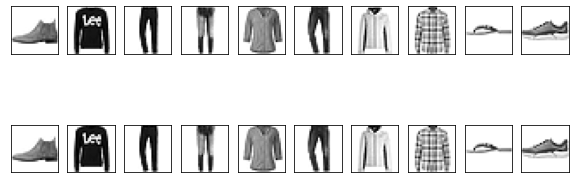

Train Epoch: 9 [0 / 60000(0%)]	Train Loss: 0.008709
Train Epoch: 9 [6400 / 60000(11%)]	Train Loss: 0.010782
Train Epoch: 9 [12800 / 60000(21%)]	Train Loss: 0.010006
Train Epoch: 9 [19200 / 60000(32%)]	Train Loss: 0.011177
Train Epoch: 9 [25600 / 60000(43%)]	Train Loss: 0.013182
Train Epoch: 9 [32000 / 60000(53%)]	Train Loss: 0.009169
Train Epoch: 9 [38400 / 60000(64%)]	Train Loss: 0.010160
Train Epoch: 9 [44800 / 60000(75%)]	Train Loss: 0.009784
Train Epoch: 9 [51200 / 60000(85%)]	Train Loss: 0.008553
Train Epoch: 9 [57600 / 60000(96%)]	Train Loss: 0.007171

[EPOCH: 9], 	Test LOSS: 0.0003


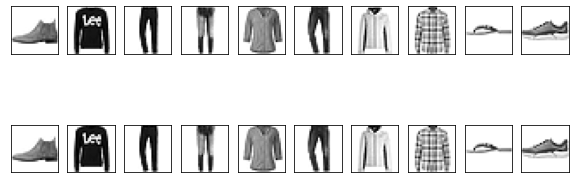

Train Epoch: 10 [0 / 60000(0%)]	Train Loss: 0.009409
Train Epoch: 10 [6400 / 60000(11%)]	Train Loss: 0.010579
Train Epoch: 10 [12800 / 60000(21%)]	Train Loss: 0.009236
Train Epoch: 10 [19200 / 60000(32%)]	Train Loss: 0.009023
Train Epoch: 10 [25600 / 60000(43%)]	Train Loss: 0.009873
Train Epoch: 10 [32000 / 60000(53%)]	Train Loss: 0.008619
Train Epoch: 10 [38400 / 60000(64%)]	Train Loss: 0.008538
Train Epoch: 10 [44800 / 60000(75%)]	Train Loss: 0.008210
Train Epoch: 10 [51200 / 60000(85%)]	Train Loss: 0.009767
Train Epoch: 10 [57600 / 60000(96%)]	Train Loss: 0.008447

[EPOCH: 10], 	Test LOSS: 0.0003


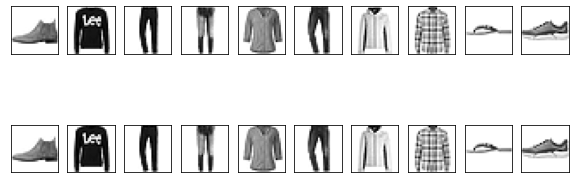

In [20]:
#### 10. AE 학습을 실행하여 test set의 reconstruction error 확인
for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, real_image, gen_image = evaluate(model, test_loader)
  print("\n[EPOCH: {}], \tTest LOSS: {:.4f}".format(Epoch, test_loss))
  f, a = plt.subplots(2, 10, figsize = (10, 4))
  for i in range(10):
    img = np.reshape(real_image[0][i], (28, 28))
    a[0][i].imshow(img, cmap = 'gray_r')
    a[0][i].set_xticks(())
    a[0][i].set_yticks(())
    
  for i in range(10):
    img = np.reshape(gen_image[0][i], (28, 28))
    a[1][i].imshow(img, cmap = 'gray_r')
    a[1][i].set_xticks(())
    a[1][i].set_yticks(())

  plt.show() 